In [2]:
import torch.nn
from matplotlib import pyplot as plt
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision import transforms

In [3]:
# 超参数
# 批量大小
batch_size = 64
# 学习率
lr = 0.01
# 冲量
momentum = 0.5
# 训练轮数
epoch = 10

In [5]:
# 获取训练的数据集
train_dataset = datasets.MNIST(root='./data', train=True, download=False, transform=transforms.ToTensor())

# 获取测试的数据集
test_dataset = datasets.MNIST(root='./data', train=False, download=False, transform=transforms.ToTensor())

# 加载训练数据集
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# 加载测试数据集
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

100%|██████████| 9.91M/9.91M [00:02<00:00, 4.25MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 117kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.09MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 11.6MB/s]


In [6]:
# 打印12张手写数字图像
def print_image():
    plt.figure()
    for i in range(12):
        plt.subplot(3, 4, i + 1)
        plt.tight_layout()
        plt.imshow(train_dataset.data[i], cmap='gray', interpolation='none')
        plt.title("Labels: {}".format(train_dataset.targets[i]))
        plt.xticks([])
        plt.yticks([])
    plt.show()

In [7]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # 刚开始时输入通道为1，10个卷积核，5*5大小
        # (28-5)/1+1=24 卷积
        # 24/2=12 池化
        # (10,12,12) 结果
        self.conv1 = torch.nn.Sequential(
            nn.Conv2d(1, 10, 5),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        # (12-5)/1+1=8卷积
        # 8/2=4池化
        # (20,4,4)结果
        # 第二次卷积，输入通道变为10，20个卷积核，5*5大小
        self.conv2 = torch.nn.Sequential(
            nn.Conv2d(10, 20, 5),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        # 2层全连接
        self.fc = torch.nn.Sequential(
            torch.nn.Linear(320, 50),
            torch.nn.Linear(50, 10)
        )

    def forward(self, x):
        size = x.size(0)
        x = self.conv1(x)
        x = self.conv2(x)
        x = x.view(size, -1)
        x = self.fc(x)
        return x


model = Net()

In [8]:
# 使用交叉熵损失
criterion = torch.nn.CrossEntropyLoss()
# 使用梯度优化
optimizer = torch.optim.SGD(model.parameters(), lr=lr, momentum=momentum)

In [9]:
def train(epoch):
    running_loss = 0.0
    running_total = 0
    running_correct = 0
    # 遍历数据集
    for batch_idx, data in enumerate(train_loader, 0):
        inputs, target = data
        # 梯度清零
        optimizer.zero_grad()
        # forward + backward + update
        outputs = model(inputs)
        # 计算损失
        loss = criterion(outputs, target)
        # 基于损失反响传播
        loss.backward()
        # 更新参数
        optimizer.step()
        # 把运行中的损失相加
        running_loss += loss.item()
        # 把运行中的准确率acc算出来
        _, predicted = torch.max(outputs.data, dim=1)
        running_total += inputs.shape[0]
        running_correct += (predicted == target).sum().item()
        if batch_idx % 300 == 299:
            print('[%d,%5d]: loss: %.3f | acc: %.2f %%' % (epoch + 1, batch_idx + 1, running_loss / 300,
                                                           100 * running_correct / running_total))
            running_loss = 0.0
            running_total = 0
            running_correct = 0


In [10]:
def test():
    correct = 0
    total = 0
    with torch.no_grad():
        for data in test_loader:
            images, labels = data
            outputs = model(images)
            _, predicted = torch.max(outputs.data, dim=1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    acc = correct / total
    print('[%d / %d]: Accuracy on test set: %.1f %% ' % (epoch + 1, epoch, 100 * acc))
    return acc

[1,  300]: loss: 1.624 | acc: 52.04 %
[1,  600]: loss: 0.420 | acc: 86.99 %
[1,  900]: loss: 0.298 | acc: 91.02 %
[1 / 0]: Accuracy on test set: 92.7 % 
[2,  300]: loss: 0.221 | acc: 93.43 %
[2,  600]: loss: 0.182 | acc: 94.51 %
[2,  900]: loss: 0.160 | acc: 94.99 %
[2 / 1]: Accuracy on test set: 96.1 % 
[3,  300]: loss: 0.131 | acc: 95.89 %
[3,  600]: loss: 0.123 | acc: 96.34 %
[3,  900]: loss: 0.117 | acc: 96.52 %
[3 / 2]: Accuracy on test set: 97.2 % 
[4,  300]: loss: 0.107 | acc: 96.69 %
[4,  600]: loss: 0.098 | acc: 97.08 %
[4,  900]: loss: 0.093 | acc: 97.29 %
[4 / 3]: Accuracy on test set: 97.7 % 
[5,  300]: loss: 0.085 | acc: 97.45 %
[5,  600]: loss: 0.089 | acc: 97.22 %
[5,  900]: loss: 0.081 | acc: 97.56 %
[5 / 4]: Accuracy on test set: 98.1 % 
[6,  300]: loss: 0.075 | acc: 97.82 %
[6,  600]: loss: 0.079 | acc: 97.60 %
[6,  900]: loss: 0.075 | acc: 97.66 %
[6 / 5]: Accuracy on test set: 98.2 % 
[7,  300]: loss: 0.072 | acc: 97.81 %
[7,  600]: loss: 0.069 | acc: 97.90 %
[7,  9

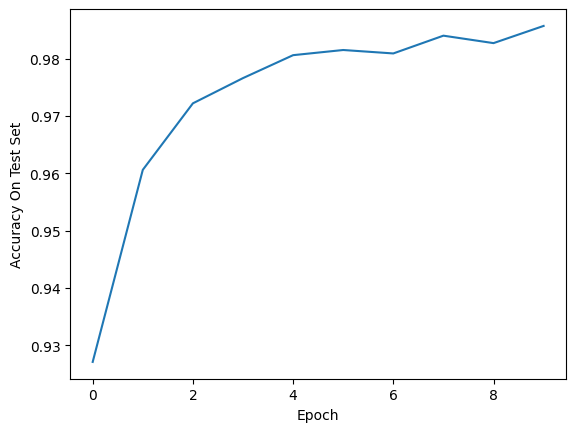

In [11]:
 # print_image()
acc_list_test = []
for epoch in range(epoch):
    train(epoch)
    acc_test = test()
    acc_list_test.append(acc_test)
plt.plot(acc_list_test)
plt.xlabel('Epoch')
plt.ylabel('Accuracy On Test Set')
plt.show()